In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x, y_true = make_blobs(n_samples=300,centers = 3,cluster_std = 0.50,random_state = 15)

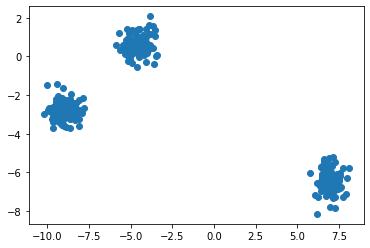

In [3]:
plt.scatter(x[:,0],x[:,1])

In [4]:
TWCSS=[]
cluster=[]
for k in range(1,20):
    WCSS=[]
    centroids=[]
    centroids=np.zeros((k,np.shape(x)[1]))
    for i in range(k):
        centroids[i]=x[i]
    for iter in range(100):
        d={}
        classification=[]    

        for i in range(k):
            d[i]=[]
        for data in x:
            distance=[]
            for i in range(k):
                distance.append(np.sum((data-centroids[i])**2)**1/2)
            idx=distance.index(min(distance))
            d[idx].append(data)
            classification.append(idx)
        for i in range(k):
            centroids[i]=np.average(d[i],axis=0)
            WCSS.append(np.linalg.norm(centroids[i]-d[i]))
#             WCSS.append(np.sum((centroids[i]-d[i])**2)**1/2)
    TWCSS.append(np.sum(WCSS))
    cluster.append(k)  

In [5]:
print(cluster)
print(TWCSS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[12674.13974841351, 4848.884573138272, 2232.750920320734, 2176.300187376563, 2272.18354431832, 2310.7903720391114, 2317.003628965762, 2350.8433153111587, 2392.1194352154016, 2356.4708014375874, 2364.3339991416597, 2377.719778397518, 2388.547208115783, 2388.7974429734704, 2407.6571009074332, 2445.531901156184, 2456.797845695577, 2461.161572346045, 2470.670414672947]


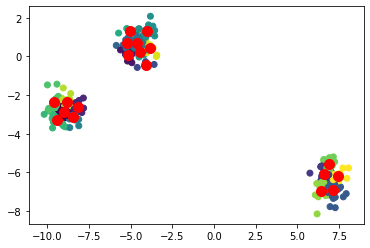

In [6]:
plt.scatter(x[:,0],x[:,1],c=classification)
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=100)

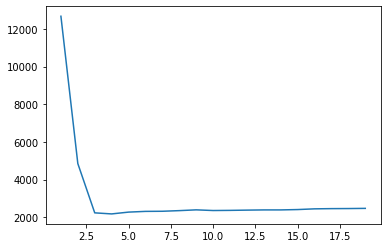

In [7]:
plt.plot(cluster,TWCSS)